In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob   
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
IMG_DIM = (150, 150)

train_notumor_files = glob.glob('/content/drive/MyDrive/기계학습/과제/Training/notumor/*')
train_notumor_files = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_notumor_files] 
train_notumor_files = np.array(train_notumor_files)

train_glioma_files = glob.glob('/content/drive/MyDrive/기계학습/과제/Training/glioma/*')
train_glioma_files = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_glioma_files] 
train_glioma_files = np.array(train_glioma_files)

train_meningioma_files = glob.glob('/content/drive/MyDrive/기계학습/과제/Training/meningioma/*')
train_meningioma_files = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_meningioma_files] 
train_meningioma_files = np.array(train_meningioma_files)

train_pituitary_files = glob.glob('/content/drive/MyDrive/기계학습/과제/Training/pituitary/*')
train_pituitary_files = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_pituitary_files] 
train_pituitary_files = np.array(train_pituitary_files)

train = np.concatenate((train_notumor_files, train_glioma_files, train_meningioma_files, train_pituitary_files), axis=0)

In [ ]:
train_labels = []
for i in range(len(train_notumor_files)):
  train_labels.append('notumor')
for i in range(len(train_glioma_files)):
  train_labels.append('glioma')
for i in range(len(train_meningioma_files)):
  train_labels.append('meningioma')
for i in range(len(train_pituitary_files)):
  train_labels.append('pituitary')

In [ ]:
test_notumor_files = glob.glob('/content/drive/MyDrive/기계학습/과제/Testing/notumor/*')
test_notumor_files = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_notumor_files] 
test_notumor_files = np.array(test_notumor_files)

test_glioma_files = glob.glob('/content/drive/MyDrive/기계학습/과제/Testing/glioma/*')
test_glioma_files = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_glioma_files] 
test_glioma_files = np.array(test_glioma_files)

test_meningioma_files = glob.glob('/content/drive/MyDrive/기계학습/과제/Testing/meningioma/*')
test_meningioma_files = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_meningioma_files] 
test_meningioma_files = np.array(test_meningioma_files)

test_pituitary_files = glob.glob('/content/drive/MyDrive/기계학습/과제/Testing/pituitary/*')
test_pituitary_files = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_pituitary_files] 
test_pituitary_files = np.array(test_pituitary_files)

test = np.concatenate((test_notumor_files, test_glioma_files, test_meningioma_files, test_pituitary_files), axis=0)

In [ ]:
test_labels = []
for i in range(len(test_notumor_files)):
  test_labels.append('notumor')
for i in range(len(test_glioma_files)):
  test_labels.append('glioma')
for i in range(len(test_meningioma_files)):
  test_labels.append('meningioma')
for i in range(len(test_pituitary_files)):
  test_labels.append('pituitary')

In [ ]:
print('Train dataset shape:', train.shape, 
      '\ttest dataset shape:', test.shape)

Train dataset shape: (5712, 150, 150, 3) 	test dataset shape: (1311, 150, 150, 3)


In [ ]:
train_scaled = train.astype('float32')
test_scaled = test.astype('float32')
train_scaled /= 255
test_scaled /= 255

In [ ]:
from sklearn.preprocessing import LabelEncoder        

le = LabelEncoder()
le.fit(train_labels)

train_labels_enc = le.transform(train_labels)
test_labels_enc = le.transform(test_labels)

print(train_labels[0:5], train_labels_enc[0:5]) 

['notumor', 'notumor', 'notumor', 'notumor', 'notumor'] [2 2 2 2 2]


In [ ]:
print('Train data shape: {0}'.format(train_scaled.shape))
print('Test data shape: {0}'.format(test_scaled.shape))

print('Train data label => %s' %Counter(train_labels_enc))
print('Test data label => %s' %Counter(test_labels_enc))

Train data shape: (5712, 150, 150, 3)
Test data shape: (1311, 150, 150, 3)
Train data label => Counter({2: 1595, 3: 1457, 1: 1339, 0: 1321})
Test data label => Counter({2: 405, 1: 306, 0: 300, 3: 300})


Text(0.5, 1.0, 'Train Data')

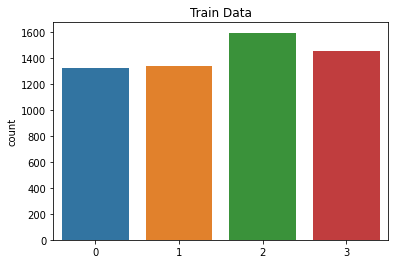

In [ ]:
p = sns.countplot(train_labels_enc)
p.set_title("Train Data")

Text(0.5, 1.0, 'Test Data')

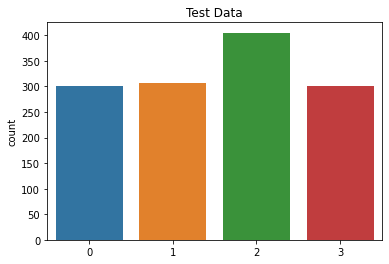

In [ ]:
p= sns.countplot(test_labels_enc)
p.set_title("Test Data")

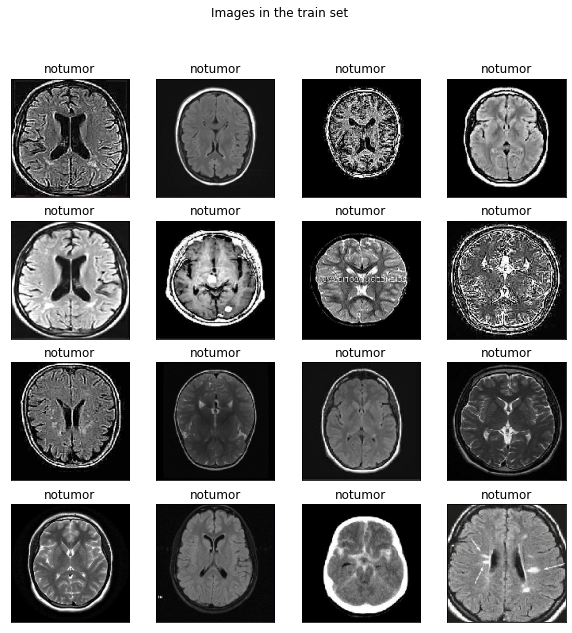

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle("Images in the train set")
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(train_scaled[i])
  plt.xticks([]); plt.yticks([])
  plt.title(train_labels[i])

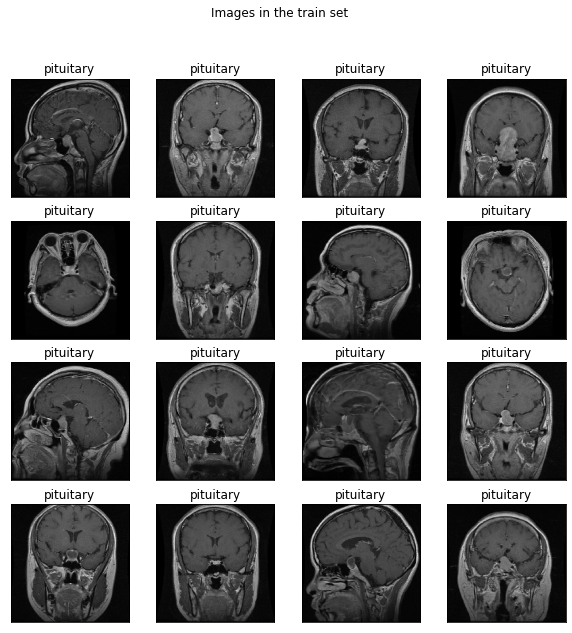

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle("Images in the train set")
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.imshow(train_scaled[-3*i])
  plt.xticks([]); plt.yticks([])
  plt.title(train_labels[-i])

# CNN basemodel

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers

import numpy as np
import tensorflow as tf
import random
from keras.regularizers import l2

In [ ]:
tf.random.set_seed(1234)
random.seed(1234)
np.random.seed(1234)

In [ ]:
cnn=Sequential()

cnn.add(Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3))) 
cnn.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.0001)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.0001)))
cnn.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.0001)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.0001)))
cnn.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.0001)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Flatten())  
cnn.add(Dense(128,activation='relu', kernel_regularizer=l2(0.001))) 
cnn.add(Dropout(0.2))
cnn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001))) 
cnn.add(Dropout(0.2))
cnn.add(Dense(4, activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=15)
hist=cnn.fit(train_scaled, train_labels_enc, validation_split=0.2, batch_size=64, epochs=100, callbacks=[es])

Epoch 1/100
72/72 [==============================] - 28s 220ms/step - loss: 1.1174 - accuracy: 0.5693 - val_loss: 1.4266 - val_accuracy: 0.4803
Epoch 2/100
72/72 [==============================] - 13s 176ms/step - loss: 0.7278 - accuracy: 0.7531 - val_loss: 1.1912 - val_accuracy: 0.6229
Epoch 3/100
72/72 [==============================] - 13s 177ms/step - loss: 0.6294 - accuracy: 0.8028 - val_loss: 0.9619 - val_accuracy: 0.7209
Epoch 4/100
72/72 [==============================] - 13s 178ms/step - loss: 0.5637 - accuracy: 0.8429 - val_loss: 1.2077 - val_accuracy: 0.6553
Epoch 5/100
72/72 [==============================] - 13s 180ms/step - loss: 0.4963 - accuracy: 0.8606 - val_loss: 0.7042 - val_accuracy: 0.7787
Epoch 6/100
72/72 [==============================] - 13s 181ms/step - loss: 0.4937 - accuracy: 0.8680 - val_loss: 1.0523 - val_accuracy: 0.6719
Epoch 7/100
72/72 [==============================] - 13s 183ms/step - loss: 0.4472 - accuracy: 0.8903 - val_loss: 0.8980 - val_accuracy:

In [ ]:
cnn.evaluate(test_scaled, test_labels_enc, batch_size=64)

21/21 [==============================] - 2s 96ms/step - loss: 0.5553 - accuracy: 0.9039


[0.555307924747467, 0.9038901329040527]

In [ ]:
from sklearn.metrics import classification_report
y_pred = cnn.predict(test_scaled)
y_pred_num = np.argmax(y_pred, axis=1)
print(classification_report(y_true=test_labels_enc, y_pred=y_pred_num))

41/41 [==============================] - 2s 28ms/step
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       300
           1       0.82      0.94      0.88       306
           2       1.00      1.00      1.00       405
           3       0.99      0.73      0.84       300

    accuracy                           0.90      1311
   macro avg       0.91      0.90      0.89      1311
weighted avg       0.91      0.90      0.90      1311



# LIME 적용

In [ ]:
!pip install LIME

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 31.8 MB/s 
  Created wheel for LIME: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=188ff3f2a6e6d43a28f68102b4b91c1cf5874f47f666442291aafbda92776b27
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built LIME


In [ ]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm

explainer = lime_image.LimeImageExplainer()

In [ ]:
segmenter = SegmentationAlgorithm('slic',
                                   n_segments=100, 
                                   compactnes=1, 
                                   sigma=1)

In [ ]:
exp = explainer.explain_instance(test_scaled[3],
                                classifier_fn=cnn.predict, 
                                top_labels=5, 
                                num_samples=1000, 
                                segmentation_fn=segmenter)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


In [ ]:
from skimage.color import label2rgb

Text(0.5, 1.0, 'Show mask only')

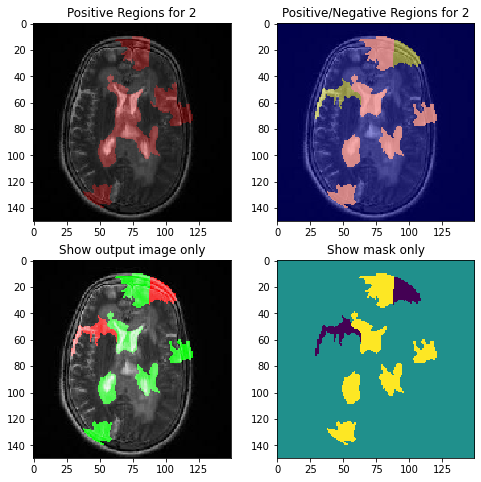

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
ax = [ax1, ax2, ax3, ax4]
for i in ax:
    i.grid(False)

temp, mask = exp.get_image_and_mask(y_pred_num[3],
                                 positive_only=True,
                                 num_features=8, 
                                 hide_rest=False) 
ax1.imshow(label2rgb(mask, temp, bg_label=0), interpolation='nearest')
ax1.set_title('Positive Regions for {}'.format(y_pred_num[3]))

temp, mask = exp.get_image_and_mask(y_pred_num[3],
                                 positive_only=False, 
                                 num_features=8, 
                                 hide_rest=False) 

ax2.imshow(label2rgb(4-mask, temp, bg_label=0), interpolation='nearest') 
ax2.set_title('Positive/Negative Regions for {}'.format(y_pred_num[3]))

ax3.imshow(temp, interpolation='nearest')
ax3.set_title('Show output image only')

ax4.imshow(mask, interpolation='nearest') 
ax4.set_title('Show mask only')

테스트셋에 적용해보기

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


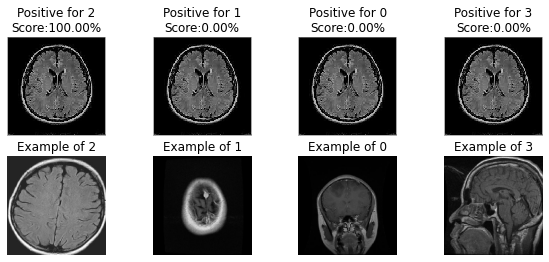

In [ ]:
%matplotlib inline
# 테스트셋의 2 번째 데이터 이용
test_idx = 2
exp = explainer.explain_instance(test_scaled[test_idx],
                              classifier_fn=cnn.predict,
                              top_labels=4,
                               num_samples=1000,
                              segmentation_fn=segmenter)

fig, m_axs = plt.subplots(2,4, figsize=(10, 4))

for i, (c_ax, gt_ax) in zip(exp.top_labels, m_axs.T):
    temp, mask=exp.get_image_and_mask(i,
                                         positive_only=True, 
                                         num_features=10,
                                         hide_rest=False, 
                                         min_weight=0.001) 
    c_ax.imshow(label2rgb(mask, temp, bg_label=0),
               interpolation='nearest')
    c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100 * y_pred[test_idx, i]))
    c_ax.axis('off')
    
    face_id = np.random.choice(np.where(train_labels_enc==i)[0])
    
    gt_ax.imshow(train_scaled[face_id])
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')